# Inferential statistics
## Part III - Inferential Analysis

We're now going to actually look for answers to the ongoing basketball discussions between you and your family. The main ones that keep being thrown around with no end in sight are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proofs to refute or support them.

### Libraries
Import the necessary libraries first.

In [3]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [4]:
wnba = pd.read_csv('../data/wnba_clean.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We will calculate a confidence interval to do the inference, do you know any other ways to do the same?**

In [11]:
# your answer here

#### Solution
The easiest way to infer an unknown population parameter is to find an interval estimate, computed from the statistics of the observed data, that might contain the true value of that parameter. This interval estimate is also known as confidence interval.

In this case, we want to compute the confidence interval that might contain the true value of the average weight of female professional basketball players from the statistics observed in our available subset of data of that population: female players from the wnba.  

To construct a confidence interval based on a normal model the first thing we need to check is that the probability distribution of the unknown parameter, which is the average weight, follows a normal distribution.

The central limit theorem (CLT) states that if you have a population with mean $\mu$ and standard deviation $\sigma$ and take sufficiently large random samples from the population (n > 30), then the distribution of the sample means will be approximately normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Does our sample meet the requirements of the CLT? These requirements are:

- The data must be sampled randomly. We DO NOT meet this requirement as our sample is exactly all the women that play in the WNBA for a specific season. By assuming that it is randomly sampled, we are introducing bias in our calculations. 
- The sample values must be independent of each other. We meet this condition as the data of one player does not provide any information of the data of another player. 
- The sample size must be sufficiently large, generally, more than 30 samples. We meet this requirement as our dataset includes more than 30 samples. 

Then, we can say that the probability distribution of the average weight is normal and we can use our dataset to approximate the population parameters and with them the parameters of the probability distribution of the average weight.

To estimate the population parameters from our sample, we can use:

- Mean

$\hat{\mu} = \mu_s$

where $\mu_s$ is the mean of our dataset.

- Standard deviation

$\hat{\sigma} = s = \sqrt{\frac{n}{n-1}}\sigma_s$

where $\sigma_s$ is the standard deviation of our dataset.

Then, the probability distribution of the average weight will be a normal $N(\hat{\mu}, \frac{\hat{\sigma}}{\sqrt{n}})$. 

We do know, however, that when we have a low number of samples or when the population standard deviation is unknown it is better to use the **Student's t distribution** since it better approximates a probability distribution that follow a normal distribution.

For this reason, we can say the confidence interval for the average of a normal population with unknown variance is defined as:

$IC_{1-\alpha} =[\hat{\mu} - t_{n-1,\frac{\alpha}{2}}*\frac{s}{\sqrt{n}}, \hat{\mu} + t_{n-1,\frac{\alpha}{2}}*\frac{s}{\sqrt{n}}]$ 



Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.

In [6]:
# your code here

In [7]:
#Solution

# Parameters
sample = wnba['Weight']
alpha = 0.05
n = len(sample)
df = n - 1
x = np.mean(sample)
s = math.sqrt(n/df) * np.std(sample)
t = stats.t.interval(1-alpha, df)[1]
se = s/math.sqrt(n)

# METHOD 1
# Confidence interval
ci = (x - (t * se) , x + (t * se))
print(f'The confidence interval is {ci}')

# METHOD 2
# Confidence interval
ci = stats.t.interval(1-alpha, df, loc=x, scale=se)
print(f'The confidence interval is {ci}')

The confidence interval is (77.15461406720749, 80.80313241166576)
The confidence interval is (77.15461406720749, 80.80313241166576)


**What can you say about these results?**

In [10]:
#your-answer-here

#### Solution
You have found the confidence interval for the average weight of professional female basketball players! This interval may or may not contain the true value of the real average weight. The confidence level indicates that the frequency of possible confidence intervals that contain the true value of average weight is 95%. 

**If your sister weights 67kg what would you tell your grandmother in regards to her assumption?**

In [9]:
#your-answer-here

#### Solution

It looks like that the average weight of a professional female basketball players falls between 77kg and 80kg which is quite higher than your sister's weight. The logic says that your grandmother may have a point and that your sister needs to either build some muscle and gain weight to reach the physical prowess required or give up her dreams of being a professional basketball player.

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

In [8]:
# your code here

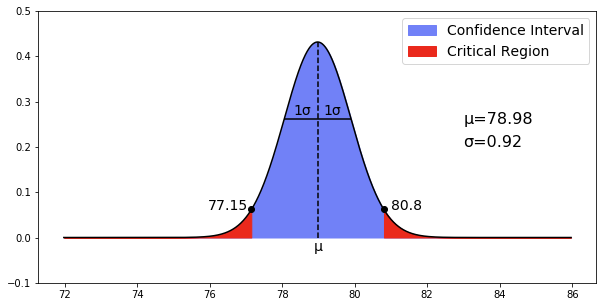

In [9]:
# Solution

# Create subplot
f, ax = plt.subplots(1, 1, figsize=(10,5))

# Find the values of the pdf (y) for the given weights (w)
w = np.arange(x-7, x+7, 0.01)
y = stats.t.pdf(w, df, loc=x, scale=se)

# Plot pdf and fill area under the curve
plt.plot(w, y, color='k')
ax.fill_between(w, 0, y, color='#7181F7', label='Confidence Interval')
ax.fill_between(w, 0, y, where= w < ci[0], color='#EA291C', label='Critical Region' )
ax.fill_between(w, 0, y, where= w > ci[1], color='#EA291C')

# Plot vertical line centered in μ
mean_limit = stats.t.pdf(x, df, loc=x, scale=se)
ax.vlines(x, 0, mean_limit, color='k', linestyle='--')
plt.text(78.88, -0.03, 'μ', fontsize=14, color='k')

# Plot horizontal line for 2σ distance
std = [x-se, x+se]
std_limit = stats.t.pdf(std, df, loc=x, scale=se)[0]
ax.hlines(std_limit, x-se, x+se, color='k', linestyle='-')
plt.text(78.3, 0.27, '1σ', fontsize=14, color='k')
plt.text(79.15, 0.27, '1σ', fontsize=14, color='k')

# Include a marker in the confidence interval limits
limits = stats.t.pdf(ci, df, loc=x, scale=se)
plt.scatter(ci, limits, marker='o', color='k')
plt.text(ci[0]-1.2, limits[0], str(round(ci[0],2)), fontsize=14)
plt.text(ci[1]+0.2, limits[1], str(round(ci[1],2)), fontsize=14)

# Plot the μ and σ values
plt.text(83, 0.25, f'μ={round(x,2)}', fontsize=16)
plt.text(83, 0.20, f'σ={round(se,2)}', fontsize=16)

# Add legend and enhance visualization
plt.legend(prop={'size': 14})
ax.set_ylim(-0.1, 0.5)
plt.savefig('../images/weight', dpi=200)
plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [10]:
# your answer here

#### Solution

We can compute the confidence interval that might contain the proportion of female professional basketball players that miss more than 40% of free throws from the statistics observed in our available sample of that population: female players from the WNBA.  

To compute the confidence interval, first we need to know which is the probability distribution of the unknown parameter, which is the proportion of female players that miss more than 40% of free throws. 

According to the CLT for proportions, given a population with proportion $p$ and $q = 1 − p$, the sample proportion of a randomly chosen sample of size n is approximately a normal distribution with $μ = \hat{p}$ and $σ = \sqrt{\frac{\hat{p}\hat{q}}{n}}$. 

Then, according to the CLT, we know that the probability distribution of the proportion is normal. 

However, to be able to compute the confidence interval we also need to make sure meet all the CLT requirements. You may refer to the previous question to check that we do, in fact, meet the requirements except for the one related to our sample being actually random.

Our interval can be calculated as follows:

$IC_{1-\alpha} =[\hat{p} - Z_{\frac{\alpha}{2}}*\sqrt{\frac{\hat{p}\hat{q}}{n}}, \hat{p} + Z_{\frac{\alpha}{2}}*\sqrt{\frac{\hat{p}\hat{q}}{n}}]$

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [12]:
# your code here

In [13]:
#Solution

# Parameters
alpha = 0.05
n = len(wnba)
z = stats.norm.interval(1-alpha)[1]
missed_more_than_40 = len(wnba[wnba['FT%'] < 60])
missed_less_or_equal_than_40 = n - missed_more_than_40
p = missed_more_than_40 / n
q = 1 - p
se = math.sqrt((p * q) / n)

# METHOD 1
# Confidence interval
ci = (p - (z * se), p + (z * se))
print(f"Confidence interval 95%: {ci}")

# METHOD 2
# Confidence interval
ci = stats.norm.interval(1-alpha, loc=p, scale=se)
print(f"Confidence interval 95%: {ci}")

**What can you comment about our result? What would you tell your sister?**

In [15]:
#your-answer-here

#### Solution

You have found the confidence interval (with 95% confidence) for the proportion of professional female basketball players that miss more than 40% of free throws! The proportion is quite low and therefore we can say that there is not enough statistical significance to say that the majority of female basketball players miss the majority of their free throws

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

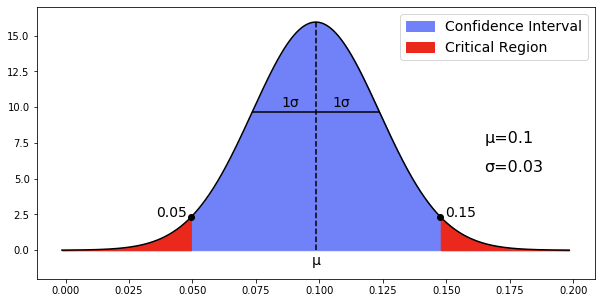

In [14]:
# Create subplot
f, ax = plt.subplots(1, 1, figsize=(10,5))

# Find the values of the pdf (y) for the given proportions of free throws (ft)
ft = np.arange(p-0.1, p+0.1, 0.0002)
y = stats.norm.pdf(ft, loc=p, scale=se)

# Plot pdf and fill area under the curve
plt.plot(ft, y, color='k')
ax.fill_between(ft, 0, y, color='#7181F7', label='Confidence Interval')
ax.fill_between(ft, 0, y, where= ft < ci[0], color='#EA291C', label='Critical Region' )
ax.fill_between(ft, 0, y, where= ft > ci[1], color='#EA291C')

# Plot vertical line centered in μ
mean_limit = stats.norm.pdf(p, loc=p, scale=se)
ax.vlines(p, 0, mean_limit, color='k', linestyle='--')
plt.text(0.097, -1, 'μ', fontsize=14, color='k')

# Plot horizontal line for 2σ distance
std = [p-se, p+se]
std_limit = stats.norm.pdf(std, loc=p, scale=se)[0]
ax.hlines(std_limit, p-se, p+se, color='k')
plt.text(0.085, 10, '1σ', fontsize=14, color='k')
plt.text(0.105, 10, '1σ', fontsize=14, color='k')

# Include a marker in the confidence interval limits
limits = stats.norm.pdf(ci, loc=p, scale=se)
plt.scatter(ci, limits, marker='o', color='k')
plt.text(ci[0]-0.014, limits[0], str(round(ci[0],2)), fontsize=14)
plt.text(ci[1]+0.002, limits[1], str(round(ci[1],2)), fontsize=14)

# Plot the μ and σ values
plt.text(0.165, 7.5, f'μ={round(p,2)}', fontsize=16)
plt.text(0.165, 5.5, f'σ={round(se,2)}', fontsize=16)

# Add legend and enhance visualization
plt.legend(prop={'size': 14})
ax.set_ylim(-2, 17)
plt.savefig('../images/proportion', dpi=200)
plt.show()

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [16]:
#your-answer-here

#### Solution

One option is to do a t-test, which tells you how significant the differences between groups are and how likely it is that they have arised by chance and not because of actual differences between the groups. Those differences are measured in averages. 

In our case let's use a two-tailed one sample t-test for the average assists. This test will help us verify the null hypothesis that the expected value of a sample of independent observations is equal to the given population mean. Our hypothesis are:

$H_0$: the mean number of assists is equal to 52.

$H_a$: the mean number of assists is different from 52.

The requirements that we need to satisfy in order to trust our test result are as follows:

- The probability distribution of the avg number of assists must be continuous (interval/ratio).
- The observations are independent of one another.
- The probability distribution of the avg number of assists should be approximately normally distributed.
- The sample we are using is a random sample.

The only one we are not satisfying is the random sample one which means that we are introducing a bias in our results.

In any case if we can reject the null hypothesis (that says that the average number of assists for female players is 52) we can look at the result statistic and see if it's higher or lower than 52.


We can also do a ONE-tailed one-sample t-test. The difference here is that the **Ha** hypothesis in the two-tailed simply affirms that the mean is different, but not higher or lower (for that we can check the result statistic of the test. The one-tailed test only detects if there's a difference in one direction (higher or lower) but not both at the same time. In this case our p-value would be half that of the two sided test since we are assuming that the difference can only go in one direction.

The one-tailed test hypothesis would be as follows:

$H_0$: the mean number of assists is less or equal than 52.

$H_a$: the mean number of assists is greater than 52.

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [15]:
#your code here

In [16]:
# Solution

# TWO TAILED TEST
# Ho: the mean number of assissts is equal to 52.
# Ha: the mean number of assissts is different to 52.

alpha = 0.05
population_mean = 52
st_two, p = stats.ttest_1samp(wnba['AST'], population_mean)

if p < alpha:
    print("Null hypothesis rejected.")
    if st_two < 0:
        print(f"The mean number of assissts is lower than {population_mean}.")
    else: 
        print(f"The mean number of assissts is greater than {population_mean}.")
else:
    print("Null hypothesis can't be rejected.")
    
print('Statistic: ', st_two)
print('p-value: ', p)

Null hypothesis rejected.
The mean number of assissts is lower than 52.
Statistic:  -2.1499947192482898
p-value:  0.033261541354107166


In [18]:
#your-answer-here

#### Solution

Since the p-value is 0.03 (meaning that there's only a 3% chance, if the null hypothesis is true, that we would see the results we have) which is less than our alpha of 0.05 we can reject the null hypothesis and accept that the mean assists for female players is different than the the mean assists of the set of female and male players. Looking at the statistic we see that it's -2.14 and therefore it seems like the mean number of assists for female players only is lower than that of the set.

Remember that we are not proving anything, we are just being sure that what we are saying is not foolishness.

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [20]:
#your-answer-here

In [17]:
# Solution

# ONE TAILED TEST  - OPTION 2
# Ho: the mean number of assissts is less or equal than 52.
# Ha: the mean number of assissts is greater than 52.

alpha = 0.05;
population_mean = 52
st_one, p_two_tailed = stats.ttest_1samp(wnba['AST'], population_mean)

p_one_tailed = p_two_tailed / 2

if p_one_tailed < alpha and st_one > 0:
    print("Null hypothesis rejected.")
    print(f"The mean number of assissts is greater than {population_mean}.")
else:
    print("Null hypothesis can't be rejected.")
    
print('Statistic: ', st_one)
print('p-value: ', p_one_tailed)

Null hypothesis can't be rejected.
Statistic:  -2.1499947192482898
p-value:  0.016630770677053583


#### Solution

In this case we cannot reject the null hypothesis since the statistic is negative, and our null hypothesis claims that the mean number of assists is less or equal than 52. In conclusion, there is not enough statistical signicance to assert that the mean number of assists is less or equal than 52.

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

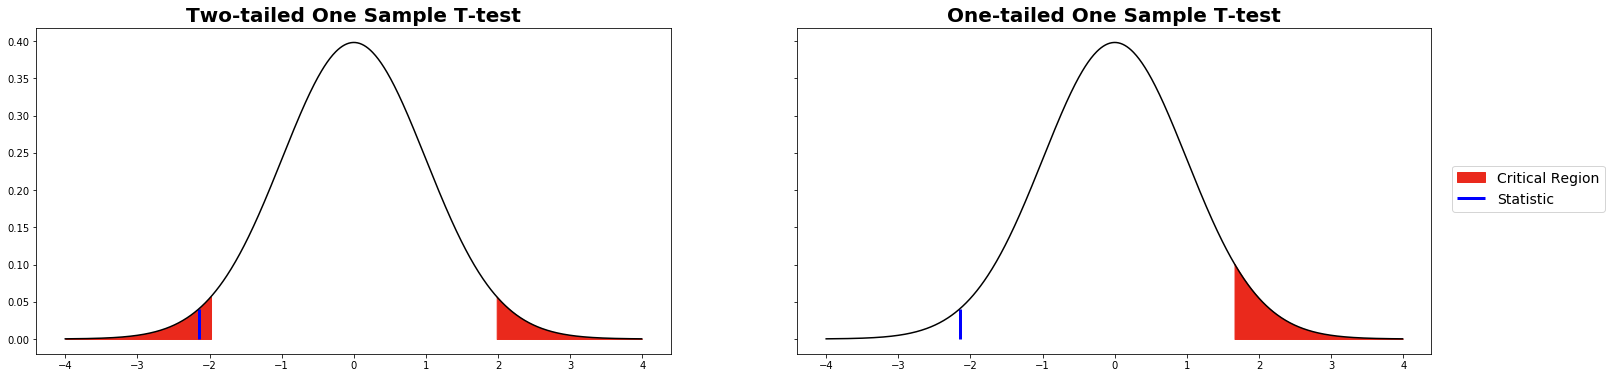

In [21]:
# Create subplot
f, ax = plt.subplots(1, 2, figsize=(25,6), sharey=True)

# Find the values of the pdf (y) for the given weights (w)
x = np.arange(-4, 4, 0.01)
y = stats.t.pdf(x, df)

# Plot pdf and fill area under the curve
ax[0].plot(x, y, color='k')
ax[1].plot(x, y, color='k')

# Compute critical region values for both test
ci_one = stats.t.interval(0.90, df)
ci_two = stats.t.interval(0.95, df)
ax[0].fill_between(x, 0, y, where= x < ci_two[0], color='#EA291C', label='Critical Region')
ax[0].fill_between(x, 0, y, where= x > ci_two[1], color='#EA291C')
ax[1].fill_between(x, 0, y, where= x > ci_one[1], color='#EA291C')

# Plot vertical line centered in the value of the statistic
st_two_limit = stats.t.pdf(st_two, df)
st_one_limit = stats.t.pdf(st_one, df)
ax[0].vlines(st_two, 0, st_two_limit, color='b', linewidth=3, label='Statistic')
ax[1].vlines(st_two, 0, st_two_limit, color='b', linewidth=3)

# Add titles
ax[0].set_title('Two-tailed One Sample T-test', fontsize=20, fontweight=600)
ax[1].set_title('One-tailed One Sample T-test', fontsize=20, fontweight=600)

# Add legend and enhance visualization
f.legend(loc='center right', prop={'size': 14})
plt.savefig('../images/t-student.png', dpi=200)
plt.show()

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

#### Solution
A test that we can use for this specific problem is what's called a "goodness of fit" test, that can tell us how well a set of observations fits some kind of distribution, in this case a normal distribution. There are various kind of goodness of fit test that can help us accept or refute the null hypothesis that our sample comes from a population with a normal distribution. One of those is the Anderson-Darling test:

- [Anderson-Darling Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

We don't need to make any assumption regarding our sample to use this kind of test.

No data analyst can remember or even know every kind of test that can be used and for this reason we invite you to research the Anderson-Darling test a bit so that you better understand the process.

**Read the Scipy documentation related to this test and apply it with a confidence level of 95%. Write down the null and the alternative hypothesis. Most importantly, understand what is the output of the Scipy function so that you're able to interpret the results correctly.**

In [19]:
# your code here

In [18]:
# Solution

# ANDERSON-DARLING TEST
# Ho: the sample of weights of our data is drawn from a normal population.
# Ha: the sample of weights of our data is not drawn from a normal population.

st, cv, alpha = stats.anderson(wnba['Weight'], dist='norm')

if st > cv[2]:
    print("Null hypothesis rejected.")
else:
    print("Null hypothesis can't be rejected.")

Null hypothesis can't be rejected.


**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here

#### Solution

According to the test we cannot refute the possibility that our sample comes from a normally distributed population. This doesn't demonstrate that it does, but at the moment we have no proof of the contrary.